# Step  #4: Machine Learning 
## Developing and testing machine learning algorithms models



## About this step
In this step, With the use of machine learning techniques, I will construct models for the different table columns that are tailored to them.

I'll make the following models:
 -  K Neighbors Classifier Model 
 - Linear Regression Model
 - Logistic Regression Model
 - Decision Tree Model

### import modules (packages)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt      
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import  LogisticRegression, LinearRegression
from IPython.display import Image, display  
import pydotplus 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
from datetime import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.linear_model import Perceptron
from time import time
from sklearn.metrics import classification_report, roc_auc_score, plot_roc_curve, plot_confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV


%matplotlib inline

### Load the Data of Terrorism dataset after cleaning

In [2]:
df = pd.read_csv('data_of_terrorism_after_cleaning.csv')

In [3]:
df.drop(columns = 'Unnamed: 0', inplace=True, axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28614 entries, 0 to 28613
Data columns (total 25 columns):
CITY                                         28614 non-null object
COUNTRY                                      28614 non-null int64
Claimed Responsibility                       28614 non-null int64
DATE                                         28614 non-null float64
FATALITIES                                   28614 non-null int64
Group Name of Perpetrator Group              14608 non-null object
Hostages                                     28614 non-null float64
INJURED                                      28614 non-null int64
LOCATION DETAILS                             13153 non-null object
Name of Entity                               28614 non-null object
Nationality of Target                        28614 non-null object
Number of Perpetrator Fatalities             28614 non-null int64
PERPETRATOR GROUP                            14608 non-null object
PROVINCE/ADMINISTRATIVE

**Firstly, I'll transform the strings in the attack targets column to numeric values in order to create the models.**
    
    I'll make a array of counters for various sorts of targets


In [5]:
Target_Types = ['Airports and Aircraft','Business', 'Educational Institution', 'Food or Water Supply', 'Government (Diplomatic)', 'Government (General)' ,'Journalists & Media', 'Maritime', 'Military', 'NGO', 'Other', 'Police',  'Private Citizens & Property', 'Religious Figures/Institutions', 'Telecommunication', 'Terrorists/Non-state Militia', 'Tourists', 'Transportation', 'Utilities',  'Violent Political Party' ]

data = [0]*len(Target_Types)

ser = pd.Series(data, index =Target_Types)

for i in range(df.shape[0]):
    for Type in Target_Types:
        if (Type in df['TARGET TYPE'][i]):
            ser[Type] = ser[Type] + 1

    
    I'll categorize the attack targets based on the number of attacks.

In [6]:
ser.sort_values()

Telecommunication                    17
Tourists                             23
Maritime                             36
Food or Water Supply                 40
Other                                50
NGO                                  90
Airports and Aircraft               107
Government (Diplomatic)             145
Violent Political Party             223
Educational Institution             370
Utilities                           373
Journalists & Media                 377
Transportation                      396
Religious Figures/Institutions      549
Government (General)               1612
Terrorists/Non-state Militia       1638
Business                           2124
Police                             3293
Military                           6872
Private Citizens & Property       12593
dtype: int64

    I'll now make a new list of attack targets sorted by the number of attacks,
    assign a numeric value to each attack target (based on its position in the list),
    and fill in the column with the terrorist event's primary attack target value.

In [7]:
Target_Types_sort = ['Private Citizens & Property', 'Military',  'Police','Business', 'Terrorists/Non-state Militia', 'Government (General)' , 'Religious Figures/Institutions','Transportation','Journalists & Media','Utilities', 'Educational Institution', 'Violent Political Party' , 'Government (Diplomatic)','Airports and Aircraft', 'NGO',  'Other', 'Food or Water Supply','Maritime', 'Tourists', 'Telecommunication' ]

data = [0]*df.shape[0]

for row in range(df.shape[0]):
    flag = True
    for Type in range(len(Target_Types_sort)):
        if (flag):
            if (Target_Types_sort[Type] in df['TARGET TYPE'][row]):
                data[row] = Type
                flag = False
df['TARGET TYPE'] = data

    Let's take a closer look at the number columns.

In [8]:
df.describe()

,COUNTRY,Claimed Responsibility,DATE,FATALITIES,Hostages,INJURED,Number of Perpetrator Fatalities,Property Damage,Ransom,Successful Attack?,Suicide_Attack,TARGET TYPE,Type of Attack,Weapon Sub_type,Weapon Type,latitude,longitude
count,28614.000000,28614.000000,2.861400e+04,28614.000000,28614.000000,28614.000000,28614.000000,28614.000000,28614.000000,28614.000000,28614.000000,28614.000000,28614.00000,28614.000000,28614.000000,28614.000000,28614.000000
mean,2.031628,0.627036,1.459446e+09,2.820927,0.079262,3.373454,0.652548,0.282869,0.002586,0.843573,0.082792,1.820018,0.79503,2.949151,0.307227,30.782069,39.815550
std,2.862513,1.453982,5.084451e+07,15.327379,0.270152,12.999723,4.419069,0.450401,0.050789,0.363266,0.275572,2.787284,1.33175,3.997059,0.707988,7.064758,8.798183
min,0.000000,0.000000,1.381784e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-28.725386,-84.284113
25%,0.000000,0.000000,1.416024e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,31.444729,36.254771
50%,0.000000,0.000000,1.454105e+09,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,2.000000,0.000000,33.302431,43.644167
75%,3.000000,0.000000,1.495228e+09,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,2.00000,4.000000,0.000000,34.186303,44.378799
max,19.000000,9.000000,1.577743e+09,1570.000000,1.000000,1500.000000,346.000000,1.000000,1.000000,1.000000,1.000000,19.000000,7.00000,29.000000,8.000000,60.157381,121.022490


    I'm going to make a new table that just has number columns in it.

In [9]:
X = df[[ 'TARGET TYPE','Type of Attack', 'Weapon Sub_type','Weapon Type',"PERPETRATOR GROUP",'Successful Attack?','Ransom', 'Hostages', 'Property Damage' , 'Suicide_Attack']].copy()

In [10]:
X = X.dropna()
X = X.reset_index()
X.drop(columns = 'index', inplace=True, axis=1)

    I'm going to make two dictionaries with the name of the group of attackers and their unique number in them.

In [11]:
dict_of_PERPETRATOR = dict()
revers_dict_of_PERPETRATOR = dict()
for i in range(len(df['PERPETRATOR GROUP'].unique())):
    dict_of_PERPETRATOR[df['PERPETRATOR GROUP'].unique()[i]] = i
    revers_dict_of_PERPETRATOR[i] = df['PERPETRATOR GROUP'].unique()[i]

## K Neighbors Classifier Model 


    The name of the attackers will be the prediction target column, 
    and the matrix of attributes we'll utilize will have columns for the type of attack, the type of weapon, and whether the attack had an impact.

In [12]:
y = X["PERPETRATOR GROUP"]
X = X[[ 'TARGET TYPE','Weapon Type','Successful Attack?']].copy()

In [13]:
y =  y.reset_index()
y.drop(columns = 'index', inplace=True, axis=1)
y =  y.replace(dict_of_PERPETRATOR).copy()

    The property matrix and the prediction column will be divided into two parts:
- 80% of the data is  training
- 20% of the data is testing

In [14]:
Xtrain, Xtest , ytrain ,ytest = train_test_split(X, y,random_state = 0, test_size=0.2)

    set up the model, k-NN classification with k = 11  


In [15]:
k =  11              
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(Xtrain, ytrain)
y_pred=clf.predict(Xtest)
print('Accuracy = ', int(metrics.accuracy_score(y_true = ytest, y_pred = y_pred)*10000)/100,"% in KNN Model with ", k," neighbors" )


C:\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy =  40.31 % in KNN Model with  11  neighbors


## Linear Regression Model 


In [16]:
"""
    The function gets database (df) and name of column (target_column)  
    and return a separate dataframe for the feature vectors 
    and a series containing the corresponding target values, determined by the 'target_column' column. 

    :param df:                           Database of Global Terrorism
    :type df:                              DataFrame 
    :param target_column:       Name of the target column
    :type target_column:           str 

    :returnX:                             The feature vector dataframe
    :rtypeX:                              DataFrame 
    :returny:                             The target values series
    :rtypey:                               Array     
"""
def load_dataset(df, target_column):
    y = df[target_column]
    X = df.drop([target_column],axis=1)

    return X, y

    A function that compares the data from different models,
    And, according to machine learning algorithms, a collection of functions that make up the model.

In [17]:
def Linear_Score(clf, x_train, x_test, y_test, y_train, model_name):
    print("#################################")
    start_time = time()
    print(model_name)
    train_score = clf.score(x_train, y_train)
    print("Train Score:{}".format(train_score))
    test_score = clf.score(x_test, y_test)
    print("Test Score:{}".format(test_score))
    print("--- {} seconds ---".format(time() - start_time))
    return train_score, test_score


def Naive_Bayes(x_train, y_train):
    gnb = GaussianNB().fit(x_train, y_train)
    return gnb


def Linear_Regression(x_train, y_train):
    clf = LinearRegression().fit(x_train, y_train)
    return clf


def Linear_BayesianRidge(x_train, y_train):
    clf = linear_model.BayesianRidge().fit(x_train, y_train)
    return clf


def Linear_Pipeline(x_train, y_train):
    clf = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression(fit_intercept=False))]).fit(
        x_train, y_train)
    return clf


def Linear_Perceptron(x_train, y_train):
    clf = Perceptron(fit_intercept=False, max_iter=10, tol=None, shuffle=False).fit(x_train, y_train)
    return clf

In [18]:
"""
    The function gets database (df) and name of column (target_column) 
    and it generates graphs depicting the link between what the models predicted and the actual data for the target column that the same function got. 

    :param df:                           Database of Global Terrorism
    :type df:                              DataFrame 
    :param target_column:       Name of the target column
    :type target_column:           str 
     
"""
def Models_scores (df, target_column):

    X, y = load_dataset(df, target_column)
    X_train, X_test , y_train ,y_test = train_test_split(X, y,random_state = 0, test_size=0.2)

    scaler = StandardScaler()
    x_scale_train = scaler.fit_transform(X_train)
    x_scale_test = scaler.transform(X_test)
    
    Linear_Regression_clf = Linear_Regression(x_scale_train, y_train)
    Linear_Pipeline_clf = Linear_Pipeline(x_scale_train, y_train)
    Linear_BayesianRidge_clf = Linear_BayesianRidge(x_scale_train, y_train)
    Linear_Perceptron_clf = Linear_Perceptron(x_scale_train, y_train)
    Naive_Bayes_clf = Naive_Bayes(x_scale_train, y_train)
    
    print("---------------------\n\n\n")
    print(target_column)
    Linear_Regression_Score = Linear_Score(Linear_Regression_clf, x_scale_train, x_scale_test, y_test, y_train, "Linear Regression")
    Linear_Pipeline_Score = Linear_Score(Linear_Pipeline_clf, x_scale_train, x_scale_test, y_test, y_train, "Linear Pipeline")
    Linear_BayesianRidge_Score = Linear_Score(Linear_BayesianRidge_clf, x_scale_train, x_scale_test, y_test, y_train, "Linear BayesianRidge")
    Linear_Perceptron_Score = Linear_Score(Linear_Perceptron_clf, x_scale_train, x_scale_test, y_test, y_train, "Linear Perceptron")
    Naive_Bayes_Score = Linear_Score(Naive_Bayes_clf, x_scale_train, x_scale_test, y_test, y_train, "Naive Bayes")
      
    labels = ['Linear Regression', 'Linear Pipeline','Linear BayesianRidge' ,'Linear Perceptron', 'Naive Bayes']
    train_accuracy = [Linear_Regression_Score[0]*100, Linear_Pipeline_Score[0]*100, Linear_BayesianRidge_Score[0]*100,Linear_Perceptron_Score[0]*100,Naive_Bayes_Score[0]*100]
    test_acuracy = [Linear_Regression_Score[1]*100, Linear_Pipeline_Score[1]*100, Linear_BayesianRidge_Score[1]*100, Linear_Perceptron_Score[1]*100,Naive_Bayes_Score[1]*100]
    Model_plots (labels, train_accuracy,test_acuracy,target_column)

In [19]:
"""
    The function gets a list of algorithm names (labels), a matrix of each model's predictions (train_accuracy),
    a matrix of all the truths that the model was intended to predict (test_acuracy) and the name of the target column (column_name)
    and it generates graph depicting the link between what the models predicted 
    and the actual data for the target column (column_name) that the same function got. 
    

    :param labels:                           List of algorithm names
    :type labels:                               List 
    :param train_accuracy:             Matrix of each model's predictions
    :type train_accuracy:                 Matrix 
    :param test_acuracy:                 Matrix of all the truths that the model was intended to predict
    :type test_acuracy:                    Matrix 
    :param column_name:              Name of the target column
    :type column_name:                   str 
"""
def Model_plots (labels, train_accuracy, test_acuracy, column_name):
    x = np.arange(len(labels))  # the label locations
    width = 0.35                       # the width of the bars
    fig, ax = plt.subplots(figsize=(10,6))
    rects1 = ax.bar(x - width/2, train_accuracy, width, label='train accuracy', color = "r")
    rects2 = ax.bar(x + width/2, test_acuracy, width, label='test acuracy', color = "lightcoral")
    ax.set_ylabel('accuracy')
    ax.set_title('accuracy of {} models'.format(column_name))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    plt.ylim([0,100])
    plt.xticks(rotation='45')
    ax.legend()
    print(fig)

    I'm going to make a new table with no terrorist occurrences that result in more than 15 people being injured or killed (extraordinary data) and no non-numerical columns.

    In addition, I'll add three more columns to reflect the year, month, and day of the week when the attack occurred.
 
     I'll also produce a graph for each column that compares the various models.

---------------------



month
#################################
Linear Regression
Train Score:0.9931081700967885
Test Score:0.9930813203171026
--- 0.00397944450378418 seconds ---
#################################
Linear Pipeline
Train Score:0.99345503027313
Test Score:0.9834246982747604
--- 0.3029038906097412 seconds ---
#################################
Linear BayesianRidge
Train Score:0.993108170069918
Test Score:0.9930813155453764
--- 0.003015279769897461 seconds ---
#################################
Linear Perceptron
Train Score:0.11991774932236658
Test Score:0.11757009345794392
--- 0.0059795379638671875 seconds ---
#################################
Naive Bayes
Train Score:0.11300121506682867
Test Score:0.11158878504672898
--- 0.05698275566101074 seconds ---
Figure(720x432)
---------------------



year
#################################
Linear Regression
Train Score:0.9997816948406628
Test Score:0.9997762032924503
--- 0.003998756408691406 seconds ---
##############################

Train Score:0.3929494242998038
Test Score:0.3159664695500993
--- 0.31789588928222656 seconds ---
#################################
Linear BayesianRidge
Train Score:0.2270365824521433
Test Score:0.20760020865452897
--- 0.0039997100830078125 seconds ---
#################################
Linear Perceptron
Train Score:0.19314889241985234
Test Score:0.19476635514018692
--- 0.008996725082397461 seconds ---
#################################
Naive Bayes
Train Score:0.09673801289840173
Test Score:0.10149532710280373
--- 0.1439969539642334 seconds ---
Figure(720x432)
---------------------



Property Damage
#################################
Linear Regression
Train Score:0.08106859571987723
Test Score:0.07089775693360034
--- 0.002997159957885742 seconds ---
#################################
Linear Pipeline
Train Score:0.22477914761489792
Test Score:-0.02215853121801703
--- 0.2909049987792969 seconds ---
#################################
Linear BayesianRidge
Train Score:0.08099902085695165
Test Sc

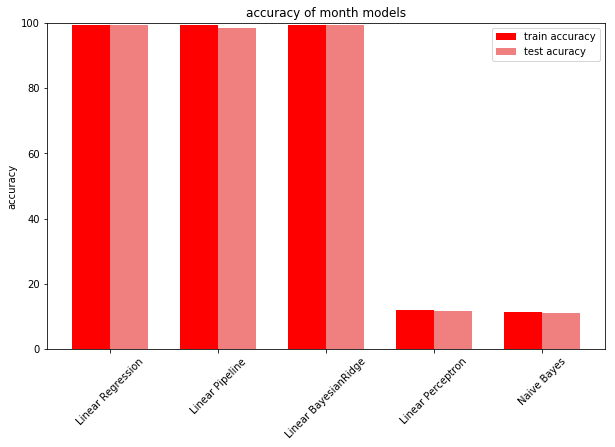

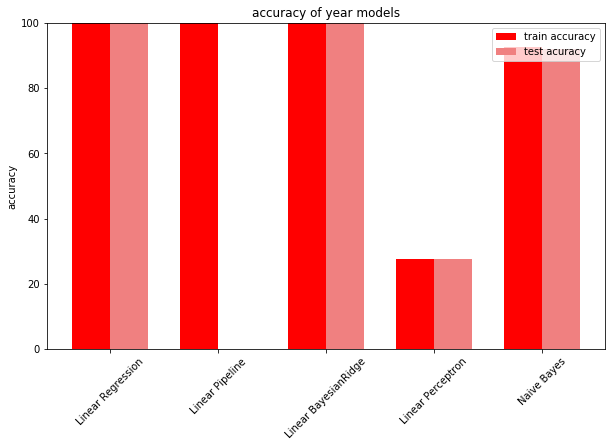

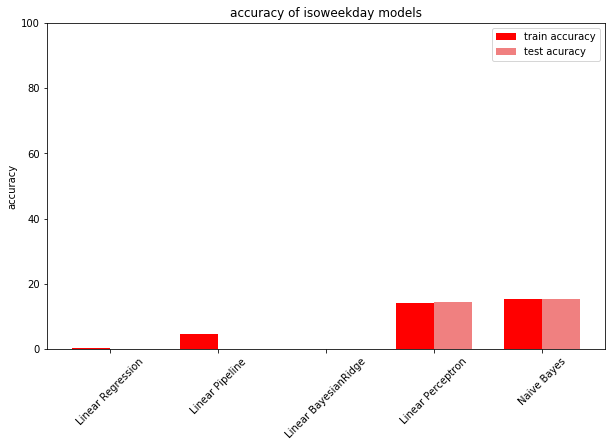

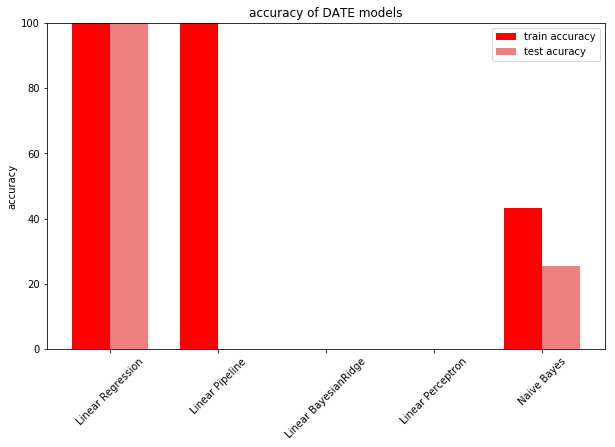

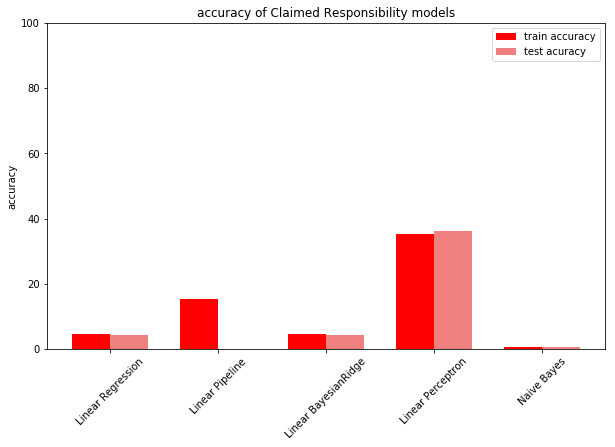

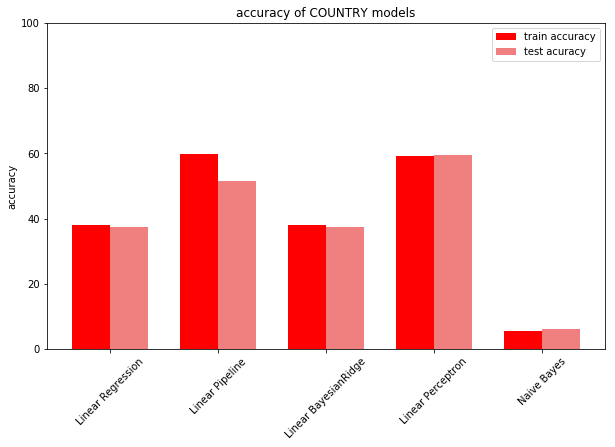

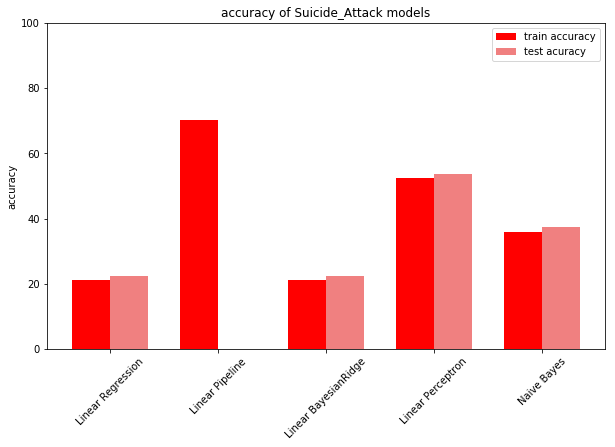

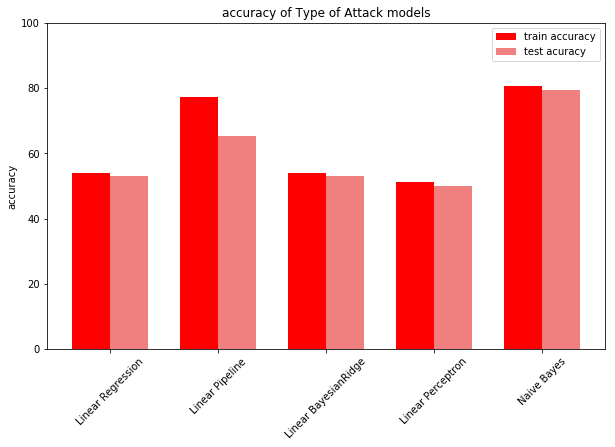

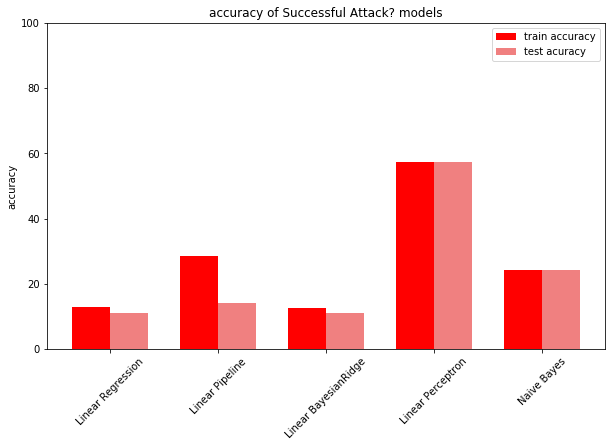

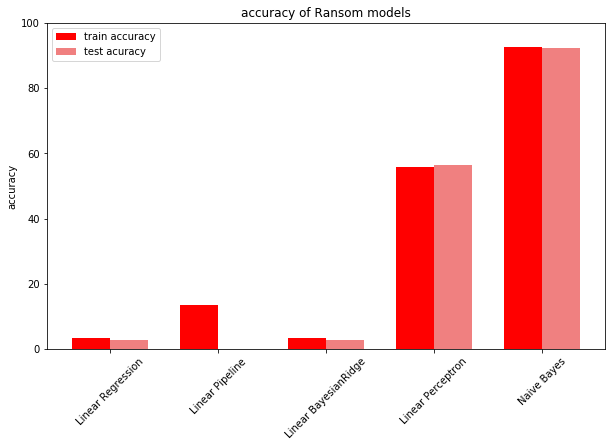

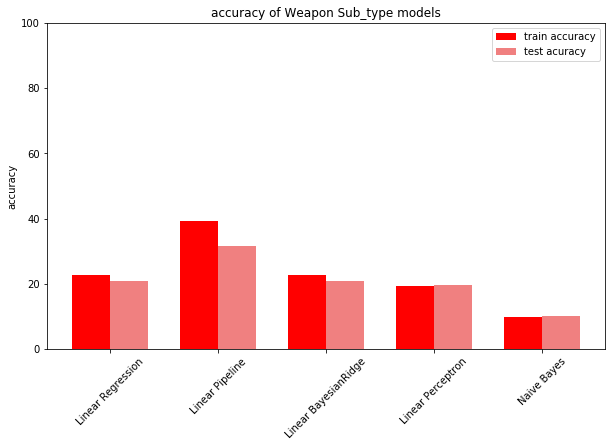

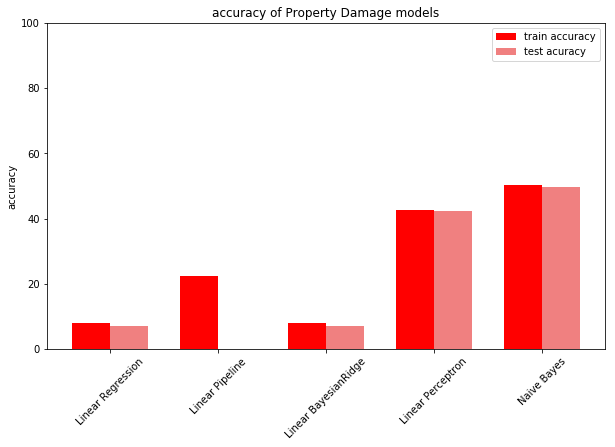

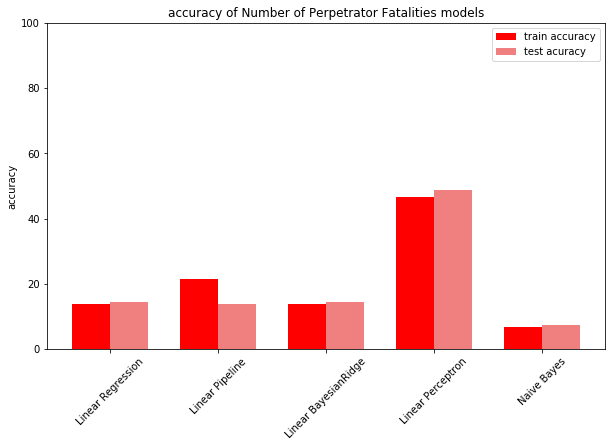

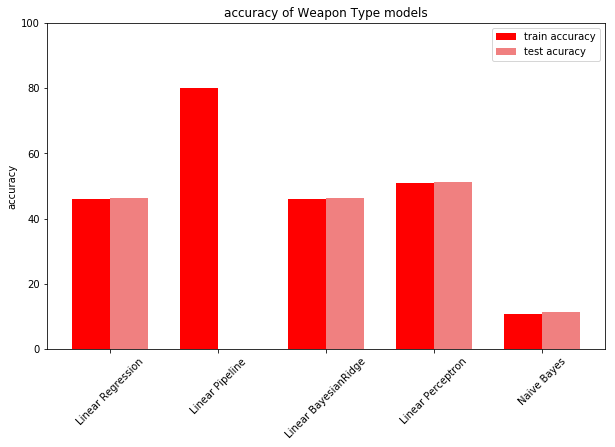

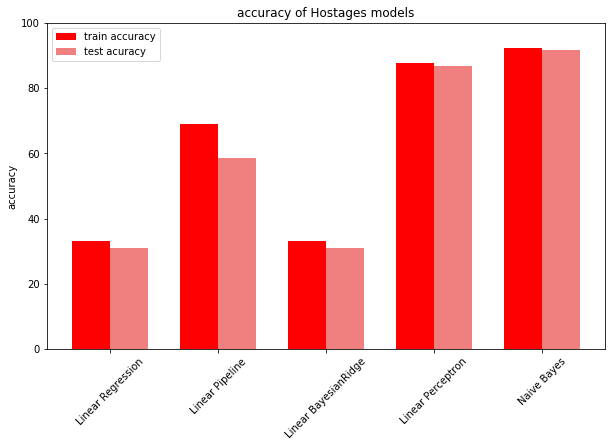

In [20]:
df1 = df[df["FATALITIES"]<15]
df1 = df1[df1["INJURED"]<15]
X1=df1[['DATE', 'Claimed Responsibility', 'COUNTRY', 'Suicide_Attack', 'Type of Attack','Successful Attack?','Ransom', 'Weapon Sub_type', 'Property Damage','Number of Perpetrator Fatalities','Weapon Type', 'Hostages','latitude', 'longitude']].copy()
X1 = X1.reset_index()
X1.drop(columns = 'index', inplace=True, axis=1)
month = list()
year = list()
isoweekday = list()

for row in range(X1.shape[0]):
    row_date = X1.DATE[row]
    month.append(datetime.fromtimestamp(row_date).month)
    year.append(datetime.fromtimestamp(row_date).year)
    isoweekday.append(datetime.fromtimestamp(row_date).isoweekday())
    
    
    
X1["month"]= month
X1["year"]= year
X1["isoweekday"] = isoweekday
    
list_types= ["month","year","isoweekday" ,'DATE', 'Claimed Responsibility', 'COUNTRY', 'Suicide_Attack', 'Type of Attack','Successful Attack?','Ransom', 'Weapon Sub_type', 'Property Damage','Number of Perpetrator Fatalities','Weapon Type', 'Hostages']
for type in list_types:
    Models_scores (X1, type)

## Logistic Regression Model


In [21]:
"""
    The function gets database (df) and name of column (target_column) 
    and the functionprints the Logistic regression model's success rate for the column whose name it was given. 

    :param df:                           Database of Global Terrorism
    :type df:                              DataFrame 
    :param target_column:       Name of the target column
    :type target_column:           str 
     
"""
def Regression_Score(df ,target_column):
    
    print("#################################")
    start_time = time()
    print(target_column) 
    features = df.columns[df.columns != target_column]
    X = df[features]
    X.drop(inplace=True,columns= ['Specific Description','Nationality of Target','Name of Entity','CITY', 'Group Name of Perpetrator Group', 'LOCATION DETAILS', 'PERPETRATOR GROUP', 'PROVINCE/ADMINISTRATIVE REGION/U.S. STATE'])
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    X_test_scaled = scaler.transform(X_test)

    clf_model = LogisticRegression().fit(X_train, y_train)
    y_pred = clf_model.predict(X_test)
    print("--- {} seconds ---".format(time() - start_time))

    resDF = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

    resDF["correct"] = abs((resDF["Actual"] ^ resDF["Predicted"]) - 1)

    print(target_column," ------ >  correct :  {} % in the LogisticRegression model ".format(int(len(resDF[resDF["correct"] == 1]) / len(resDF)*10000)/100))
    
    return


    I'm going to verify the Logistic regression model's success rate 
    on the "Successful Attack?","Suicide_Attack" and "Property Damage" columns presently.
    These are columns that have binary values in them.

In [22]:
list_types_reg= ['Successful Attack?','Suicide_Attack' ,'Property Damage'] 
for type in list_types_reg:
    Regression_Score(df, type)

#################################
Successful Attack?


C:\Anaconda3\envs\py35\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


--- 0.4040107727050781 seconds ---
Successful Attack?  ------ >  correct :  84.08 % in the LogisticRegression model 
#################################
Suicide_Attack


C:\Anaconda3\envs\py35\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Anaconda3\envs\py35\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


--- 0.14731907844543457 seconds ---
Suicide_Attack  ------ >  correct :  91.59 % in the LogisticRegression model 
#################################
Property Damage
--- 0.12498593330383301 seconds ---
Property Damage  ------ >  correct :  71.37 % in the LogisticRegression model 


## Decision Tree Model

In [23]:
def splitData(features):
    """
    The function split a subset of the terror dataset, given by the features, into train and test sets.
    A function that gets a list of column names (features).
    The function generates a matrix of attributes from the columns (The names of the columns come from the input.).
    And from the "Successful Attack?" column, it constructs a prediction column.
    The property matrix and prediction column will then be split into two sections:
    - 50% of the data is  training
    - 50% of the data is testing
    They will then be returned.
    
    :param features:         List of column names from data_of_terrorism DataFrame
    :type features:            List 


    :returnXTrain:             50% of the property matrix
    :rtypeXTrain:               DataFrame 
    :returnXTest:               50% of the property matrix
    :rtypeXTest:                DataFrame   
    :returnyTrain:              50% of the prediction column
    :rtypeyTrain:               Array   
    :returnyTest:               50% of the prediction column
    :rtypeyTest:                 Array   

"""
    df_predictors = df[features].values
    df_labels = df["Successful Attack?"].values
    
    # Split into training and test sets
    XTrain, XTest, yTrain, yTest = train_test_split(df_predictors, df_labels, random_state=1, test_size=0.5)
    return XTrain, XTest, yTrain, yTest

In [24]:
"""
    The function gets a decision tree classifier model (my_tree) and a list of column names (features)
    and render (draw) the visualization of a tree.
    
    :param features:         A decision tree classifier model
    :type features:            sklearn.tree._classes.DecisionTreeClassifier 
    :param features:         List of column names from data_of_terrorism DataFrame
    :type features:            List 

"""
def renderTree(my_tree, features):
    # hacky solution of writing to files and reading again
    # necessary due to library bugs
    filename = "temp.dot"
    with open(filename, 'w') as f:
        f = tree.export_graphviz(my_tree, 
                                 out_file=f, 
                                 feature_names=features, 
                                 class_names=["Failed ", "Successful Attack"],                             
                                 filled=True, 
                                 rounded=True,
                                 special_characters=True)
  
    dot_data = ""
    with open(filename, 'r') as f:
        dot_data = f.read()

    graph = pydotplus.graph_from_dot_data(dot_data)
    image_name = "Successful_Attack.png"
    graph.write_png(image_name)  
    display(Image(filename=image_name))

    I'm going to make a decision tree to see what factors contribute to the attack's success.
    In addition, I'll examine the model's accuracy percentages in both training and test data.

Accuracy on training data =  0.8442021388131684
Accuracy on test data =  0.8429440134200042


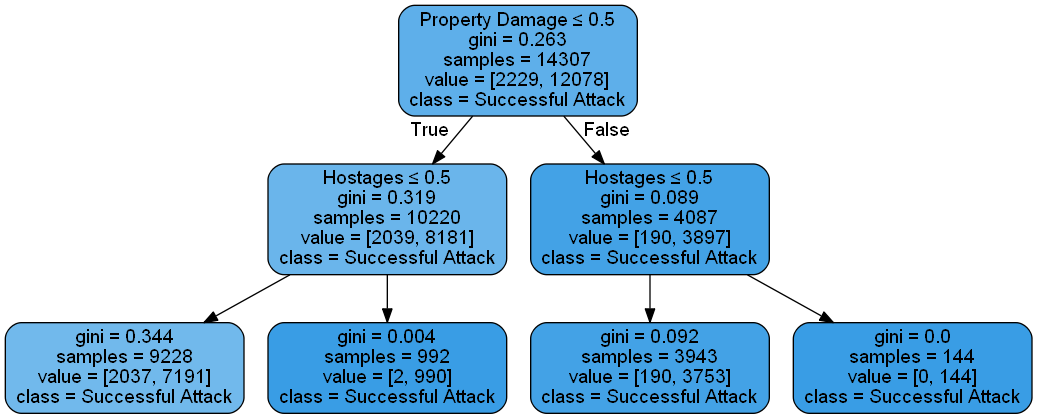

In [25]:
decisionTree = tree.DecisionTreeClassifier(max_depth=2, min_samples_split=20)
used_features = ["Hostages" ,'Ransom', "Suicide_Attack",'Property Damage']
XTrain, XTest, yTrain, yTest = splitData(used_features)
# fit the tree with the traing data
decisionTree = decisionTree.fit(XTrain, yTrain)

# predict with the training data
y_pred_train = decisionTree.predict(XTrain)
# measure accuracy
print('Accuracy on training data = ', 
      metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

# predict with the test data
y_pred = decisionTree.predict(XTest)
# measure accuracy
print('Accuracy on test data = ', 
      metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

renderTree(decisionTree, used_features)

    As can be observed, all of the graph's leaves are "successful Attacks"
    Lets check if the data is balanced:


In [26]:
y = df['Successful Attack?']
df.drop(columns=['Successful Attack?'], inplace=True)
desc = df['Specific Description']

In [27]:
new_df = df.apply(lambda z: z.astype('category').cat.codes if z.dtype == object else z)
new_df = new_df.drop(columns=['Specific Description'])

In [28]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([ 4476, 24138], dtype=int64))

    The data is imbalanced.
    most of the data in column "Successful Attack?" is 1 (successful),
    therefore I'll need to balance the data in the table.

In [29]:
x_train, x_test, y_train, y_test = train_test_split(new_df, y, test_size=0.3, stratify=y)

In [30]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([ 3133, 16896], dtype=int64))

    To balance the data, I'll utilize SMOTE method.

In [31]:
x_train, y_train = SMOTE().fit_resample(x_train, y_train) # Data balancing

    I'll start looking for the greatest model now.

In [32]:
param_space = {
    'model__max_features': ['auto', 'sqrt', 'log2', None],
    'model__criterion': ['gini', 'entropy']
}
model = Pipeline(steps=[('scaler', StandardScaler()), ('model', DecisionTreeClassifier())])
model = GridSearchCV(model, param_grid=param_space, cv=3, return_train_score=True, verbose=10, scoring=('roc_auc')).fit(x_train, y_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] model__criterion=gini, model__max_features=auto .................
[CV]  model__criterion=gini, model__max_features=auto, score=(train=1.000, test=0.825), total=   0.1s
[CV] model__criterion=gini, model__max_features=auto .................
[CV]  model__criterion=gini, model__max_features=auto, score=(train=1.000, test=0.928), total=   0.1s
[CV] model__criterion=gini, model__max_features=auto .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  model__criterion=gini, model__max_features=auto, score=(train=1.000, test=0.930), total=   0.1s
[CV] model__criterion=gini, model__max_features=sqrt .................
[CV]  model__criterion=gini, model__max_features=sqrt, score=(train=1.000, test=0.846), total=   0.1s
[CV] model__criterion=gini, model__max_features=sqrt .................
[CV]  model__criterion=gini, model__max_features=sqrt, score=(train=1.000, test=0.917), total=   0.1s
[CV] model__criterion=gini, model__max_features=sqrt .................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s


[CV]  model__criterion=gini, model__max_features=sqrt, score=(train=1.000, test=0.934), total=   0.1s
[CV] model__criterion=gini, model__max_features=log2 .................
[CV]  model__criterion=gini, model__max_features=log2, score=(train=1.000, test=0.839), total=   0.1s
[CV] model__criterion=gini, model__max_features=log2 .................
[CV]  model__criterion=gini, model__max_features=log2, score=(train=1.000, test=0.931), total=   0.1s
[CV] model__criterion=gini, model__max_features=log2 .................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.6s remaining:    0.0s


[CV]  model__criterion=gini, model__max_features=log2, score=(train=1.000, test=0.930), total=   0.1s
[CV] model__criterion=gini, model__max_features=None .................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.6s remaining:    0.0s


[CV]  model__criterion=gini, model__max_features=None, score=(train=1.000, test=0.893), total=   0.2s
[CV] model__criterion=gini, model__max_features=None .................
[CV]  model__criterion=gini, model__max_features=None, score=(train=1.000, test=0.944), total=   0.2s
[CV] model__criterion=gini, model__max_features=None .................
[CV]  model__criterion=gini, model__max_features=None, score=(train=1.000, test=0.951), total=   0.2s
[CV] model__criterion=entropy, model__max_features=auto ..............
[CV]  model__criterion=entropy, model__max_features=auto, score=(train=1.000, test=0.854), total=   0.1s
[CV] model__criterion=entropy, model__max_features=auto ..............
[CV]  model__criterion=entropy, model__max_features=auto, score=(train=1.000, test=0.922), total=   0.1s
[CV] model__criterion=entropy, model__max_features=auto ..............
[CV]  model__criterion=entropy, model__max_features=auto, score=(train=1.000, test=0.943), total=   0.1s
[CV] model__criterion=en

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    2.9s finished


In [33]:
model.best_params_

{'model__criterion': 'entropy', 'model__max_features': None}

In [34]:
model = Pipeline(steps=[('scaler', StandardScaler()), ('model', DecisionTreeClassifier(criterion='entropy', max_features=None,max_depth=3, min_samples_split=20))])
model = model.fit(x_train, y_train)

In [35]:
model.score(x_test, y_test) # Great score

0.9336051252184042

    I'm going to show you a "confusion matrix" to assess the accuracy of a classification for Desicion Tree model
     and in addition receiver Operating Characteristic Curve for Desicion Tree.

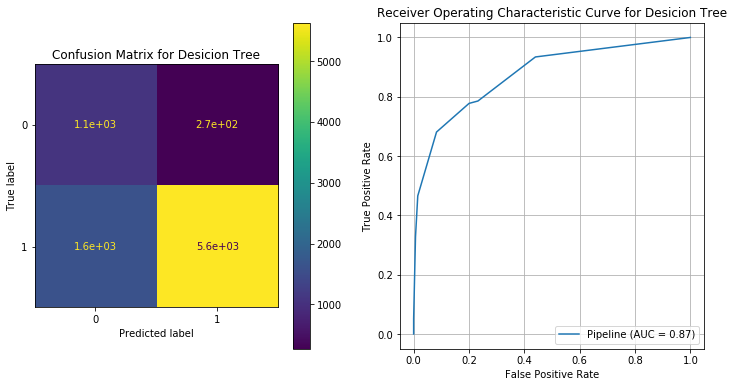

In [36]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Confusion Matrix for Desicion Tree')
plot_confusion_matrix(model, x_test, y_test, ax=plt.gca())
plt.subplot(1, 2, 2)
plt.grid()
plt.title('Receiver Operating Characteristic Curve for Desicion Tree')
plot_roc_curve(model, x_test, y_test, ax=plt.gca())
plt.show()

    Now I'll show you the decision tree.

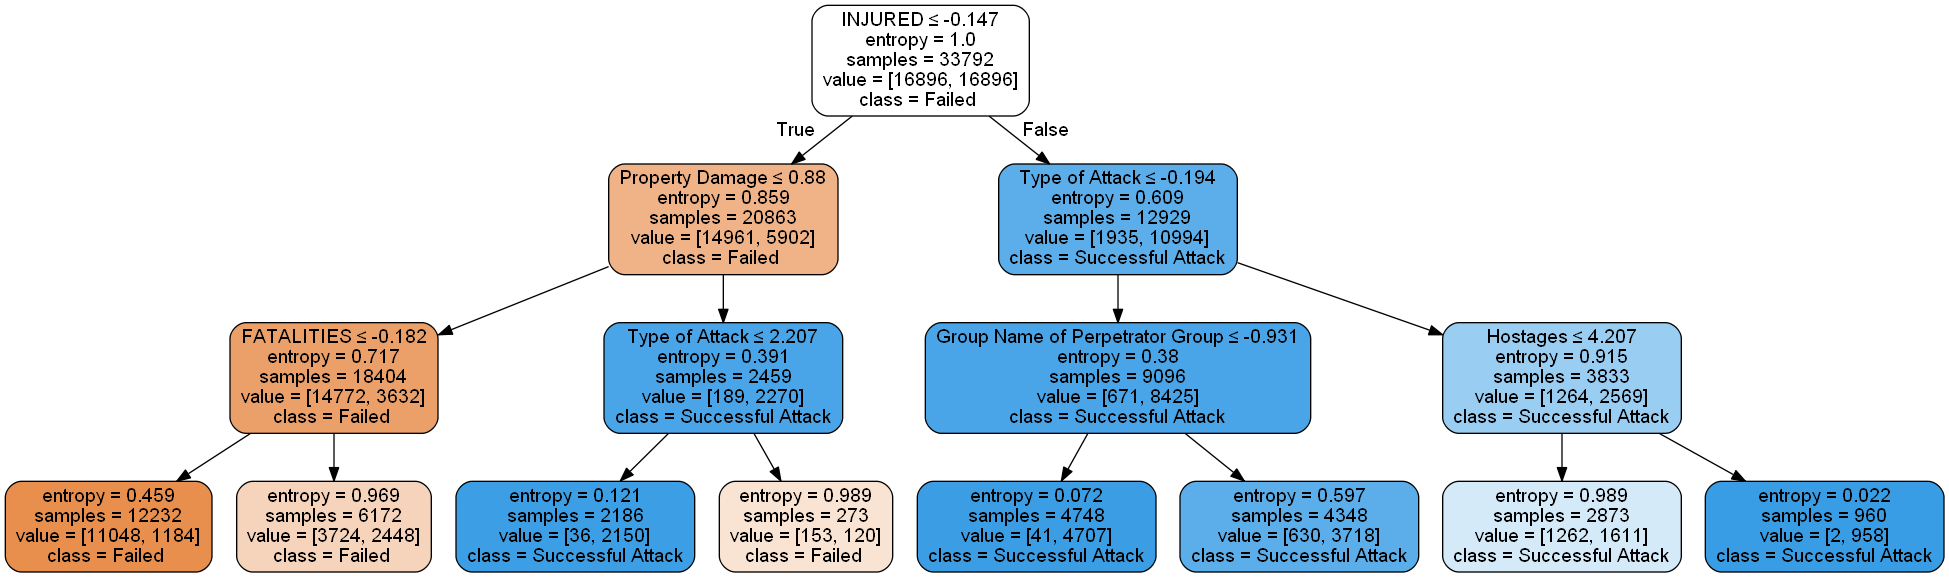

In [37]:
renderTree(model.steps[1][1], x_train.columns)